In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
from os.path import join
print(os.listdir("../input"))
path = "../input"

# Any results you write to the current directory are saved as output.

['survey_results_schema.csv', 'survey_results_public.csv']


## Reading the data

In [2]:
df = pd.read_csv(join(path, 'survey_results_public.csv'), low_memory=False)

In [3]:
df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,...,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,...,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Moderately dissatisfied,Neither satisfied nor dissatisfied,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,1.0,7.0,10.0,8.0,2.0,5.0,4.0,3.0,6.0,9.0,1.0,5.0,3.0,7.0,10.0,4.0,11.0,9.0,6.0,2.0,8.0,3.0,1.0,...,4.0,6.0,7.0,2.0,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,Depends on what it is,Depends on what it is,Upper management at the company/organization,Yes,10 (Very Likely),A few times per month or weekly,Yes,A few times per month or weekly,Yes,"No, I have one but it's out of date",7,Yes,A little bit interested,A little bit interested,A little bit interested,A little bit interested,A little bit interested,Between 6:01 - 7:00 AM,5 - 8 hours,30 - 59 minutes,Never,Ergonomic keyboard or mouse,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,6-8 years,Moderately satisfied,Moderately satisfied,Working as a founder or co-founder

# Top 10 Countries 

Text(0.5,1,'Number of respondant per country')

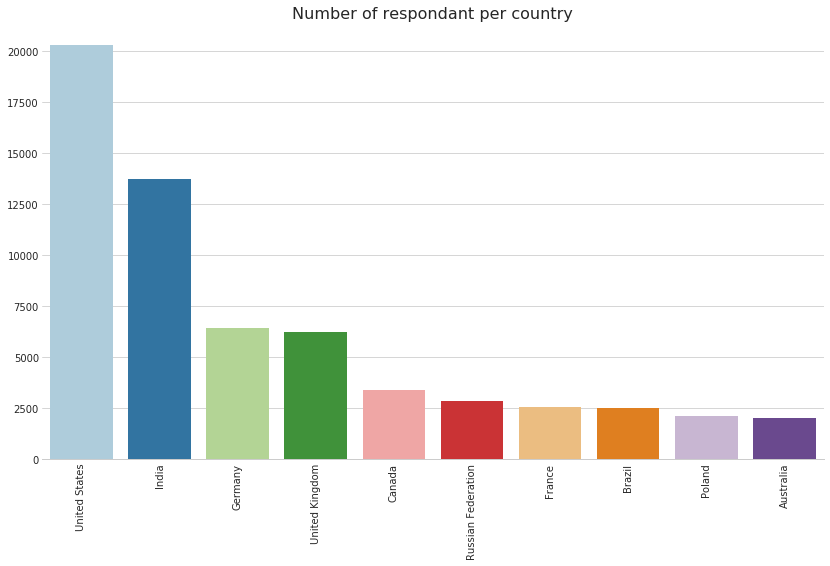

In [4]:
car_sat_count = df['Country'].value_counts()[:10]

fig = plt.figure(figsize=(14, 8))
sns.barplot(x=car_sat_count.index, y=car_sat_count.values, palette='Paired')
sns.despine(left=True)
plt.xticks(rotation='vertical')
plt.title('Number of respondant per country', fontsize=16)

> We can see that the USA is the country with the most respondant

# Hobbiest or Not

Text(0.5,1,"Number of respondent who code as a hobby vs who don't")

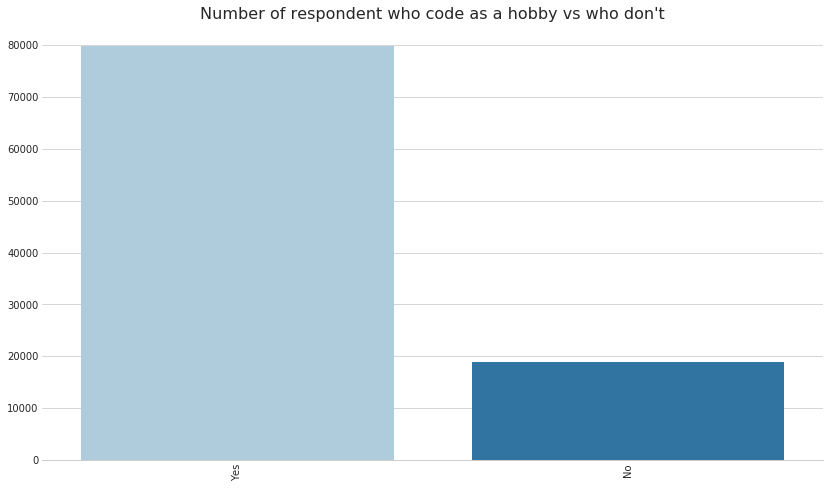

In [5]:
hobbiest_count = df['Hobby'].value_counts()

fig = plt.figure(figsize=(14, 8))
sns.barplot(x=hobbiest_count.index, y=hobbiest_count.values, palette='Paired')
sns.despine(left=True)
plt.xticks(rotation='vertical')
plt.title('Number of respondent who code as a hobby vs who don\'t', fontsize=16)

> Majority of the respondants code as a hobby.

# Open Source contributour

Text(0.5,1,'Number of Open Source Contributour')

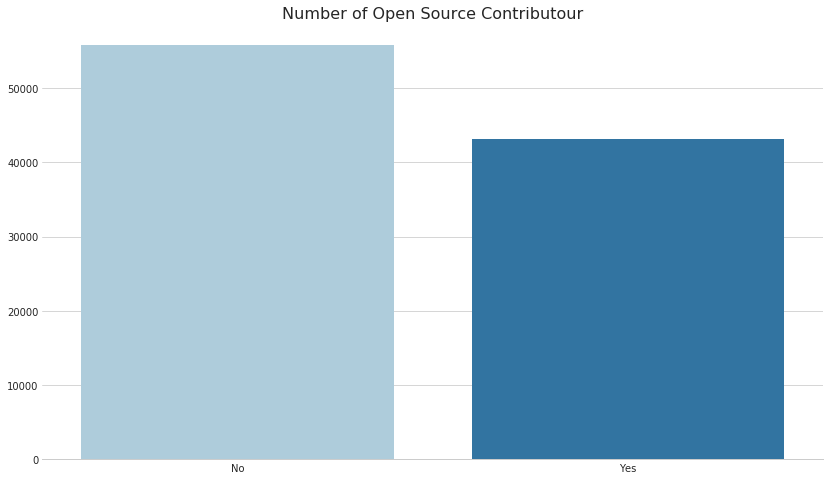

In [10]:
open_source_count = df['OpenSource'].value_counts()

plt.figure(figsize=(14, 8))
sns.barplot(x=open_source_count.index, y=open_source_count.values, palette='Paired')
sns.despine(left=True)
plt.title('Number of Open Source Contributour', fontsize=16)


> The number of respondants who dpn't contribute to Open Source is higher than those who don't 

# Does coding as a hobby affect contributing to Open Source ??

Text(0.5,1,'Number of Open Source Contributour')

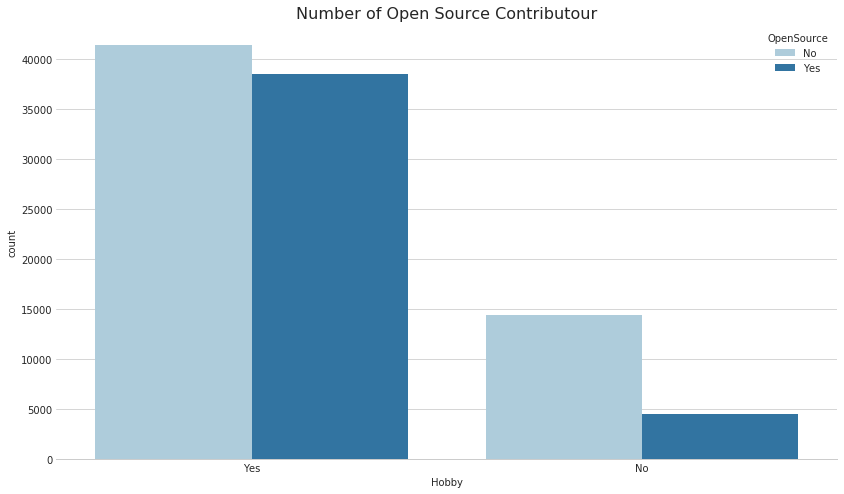

In [13]:
open_source_count = df['OpenSource'].value_counts()

plt.figure(figsize=(14, 8))
sns.countplot(df['Hobby'], palette='Paired', hue=df['OpenSource'])
sns.despine(left=True)
plt.title('Number of Open Source Contributour', fontsize=16)

> Thse who code as a hobby are more likely to contribute to Open source

# Student or Not ?

Text(0.5,1,'Number Of Student')

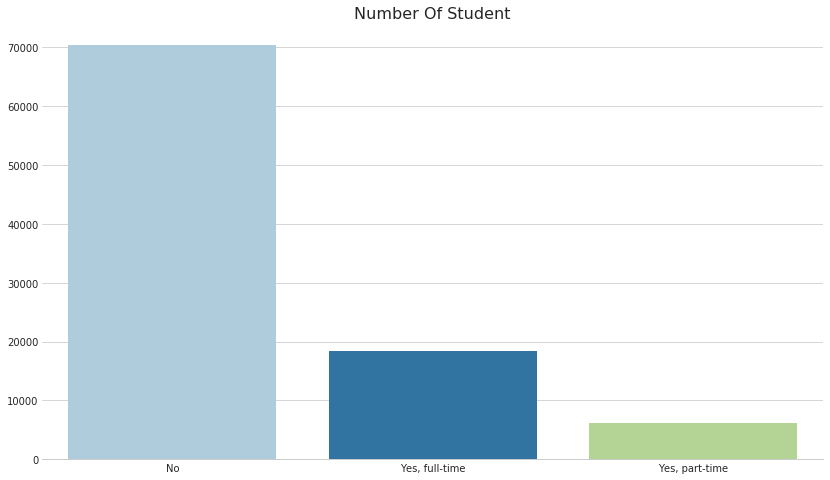

In [18]:
student_count = df['Student'].value_counts()

plt.figure(figsize=(14, 8))

sns.barplot(x=student_count.index, y= student_count.values, palette='Paired')
sns.despine(left=True)
plt.title('Number Of Student', fontsize=16)


 > Majority of respondants were not student.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

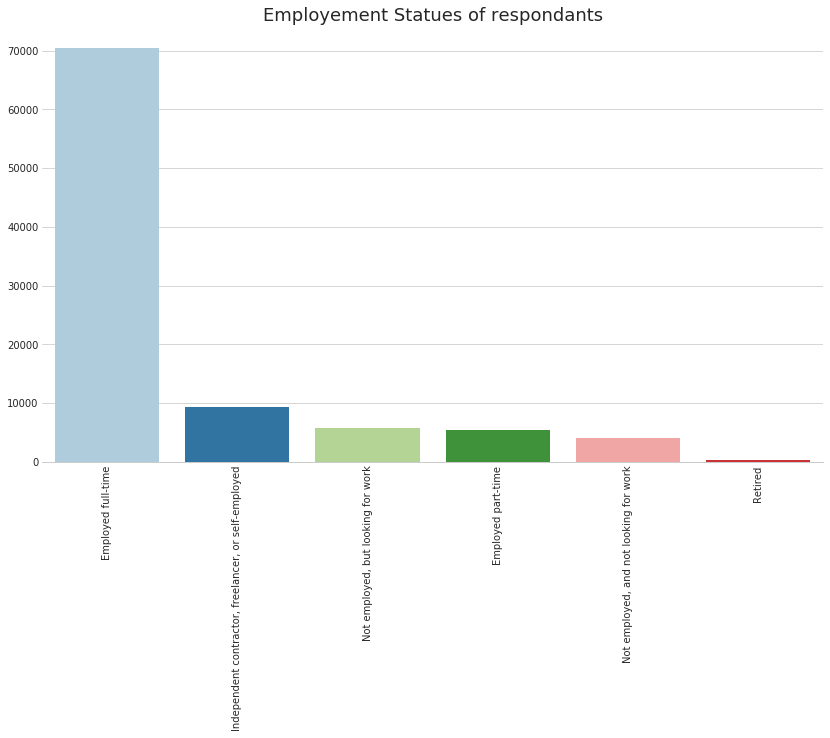

In [29]:
df.head()
plt.figure(figsize=(14, 8))
employment_count = df['Employment'].value_counts()

sns.barplot(x=employment_count.index, y=employment_count.values, palette='Paired')
sns.despine(left=True)
plt.title('Employement Statues of respondants', fontsize=18)
plt.xticks(rotation='vertical')

> Majority of respondants are working full time